plots of SOG model run
- 1100 x 10 x 101 domain
- 1 day
- Neumann boundary conditions; know that function is called, but is it working?

In [1]:
import os
import re
import netCDF4 as nc

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
f=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_SOG_01/SOG2D_1h_20141019_20141020_ptrc_T.nc')
f2=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_SOG_01/SOG2D_1h_20141019_20141020_grid_T.nc')
fkeys=f.variables.keys()
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
z=f.variables[zkey][:]
t=f.variables['time_counter'][:]
xx,zz=np.meshgrid(lons,-z[:])
tt,tz=np.meshgrid(t,-z[:])
xt,yt=np.meshgrid(lons,lats)

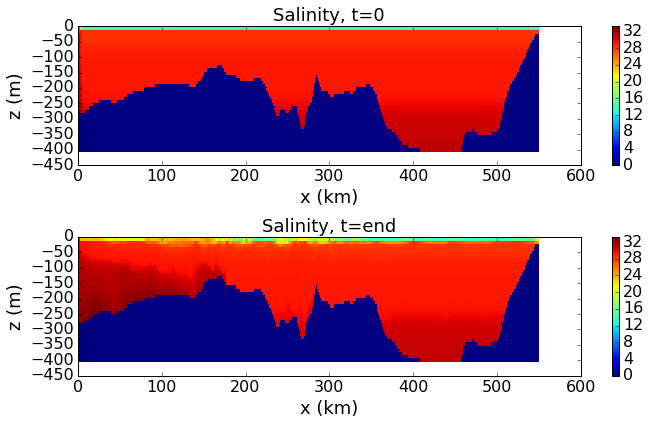

In [3]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
mesh0=axs[0].pcolormesh(xx,zz,f2.variables['vosaline'][0,:,5,:])
cb0=fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)', fontsize=18)
axs[0].set_xlabel('x (km)', fontsize=18)
axs[0].set_title('Salinity, t=0', fontsize=18)
#axs[0].autoscale(tight='True')
#axs[0].axis([0, 550, -50, 0])
#axs[0].axis([400, 550, -150, 0])
plt.setp(axs[0].get_xticklabels(),fontsize=16)
plt.setp(axs[0].get_yticklabels(),fontsize=16)
cb0.ax.tick_params(labelsize=16)

mesh1=axs[1].pcolormesh(xx,zz,f2.variables['vosaline'][-1,:,5,:])
cb1=fig.colorbar(mesh1,ax=axs[1])
axs[1].set_ylabel('z (m)', fontsize=18)
axs[1].set_xlabel('x (km)', fontsize=18)
axs[1].set_title('Salinity, t=end', fontsize=18)
#axs[1].autoscale(tight='True')
#axs[1].axis([0, 550, -50, 0])
#axs[1].axis([400, 550, -150, 0])
plt.setp(axs[1].get_xticklabels(),fontsize=16)
plt.setp(axs[1].get_yticklabels(),fontsize=16)
cb1.ax.tick_params(labelsize=16)
plt.tight_layout()

In [4]:
A=np.sum(f2.variables['vosaline'][-1,:,:,1090:1099])
print(A)
B=np.sum(f2.variables['vosaline'][0,:,:,1090:1099])
print(B)
print((A-B)/B*100,'%')

2792.7
2644.87
5.58951944113 %


In [5]:
print(f2.variables['vosaline'][0,10:20,5,15])

[ 29.31356621  29.34072495  29.35553551  29.36097336  29.36978912
  29.38357925  29.39004898  29.39531898  29.39654922  29.44296837]


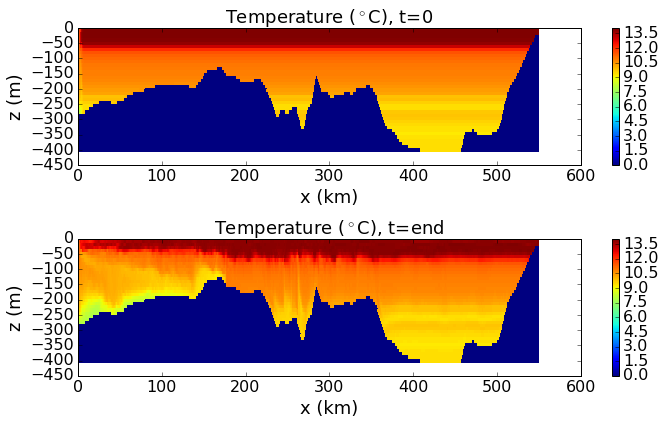

In [6]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
mesh0=axs[0].pcolormesh(xx,zz,f2.variables['votemper'][0,:,5,:])
cb0=fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)', fontsize=18)
axs[0].set_xlabel('x (km)', fontsize=18)
axs[0].set_title('Temperature ($^\circ$C), t=0', fontsize=18)
#axs[0].autoscale(tight='True')
#axs[0].axis([0, 550, -400, 0])
plt.setp(axs[0].get_xticklabels(),fontsize=16)
plt.setp(axs[0].get_yticklabels(),fontsize=16)
cb0.ax.tick_params(labelsize=16)

mesh1=axs[1].pcolormesh(xx,zz,f2.variables['votemper'][-1,:,5,:])
cb1=fig.colorbar(mesh1,ax=axs[1])
axs[1].set_ylabel('z (m)', fontsize=18)
axs[1].set_xlabel('x (km)', fontsize=18)
axs[1].set_title('Temperature ($^\circ$C), t=end', fontsize=18)
#axs[1].autoscale(tight='True')
#axs[1].axis([0, 550, -400, 0])
plt.setp(axs[1].get_xticklabels(),fontsize=16)
plt.setp(axs[1].get_yticklabels(),fontsize=16)
cb1.ax.tick_params(labelsize=16)
plt.tight_layout()

NO3
NH4
Si
PHY2
PHY
MYRI
MICZ
DOC
POC
bSi
O2


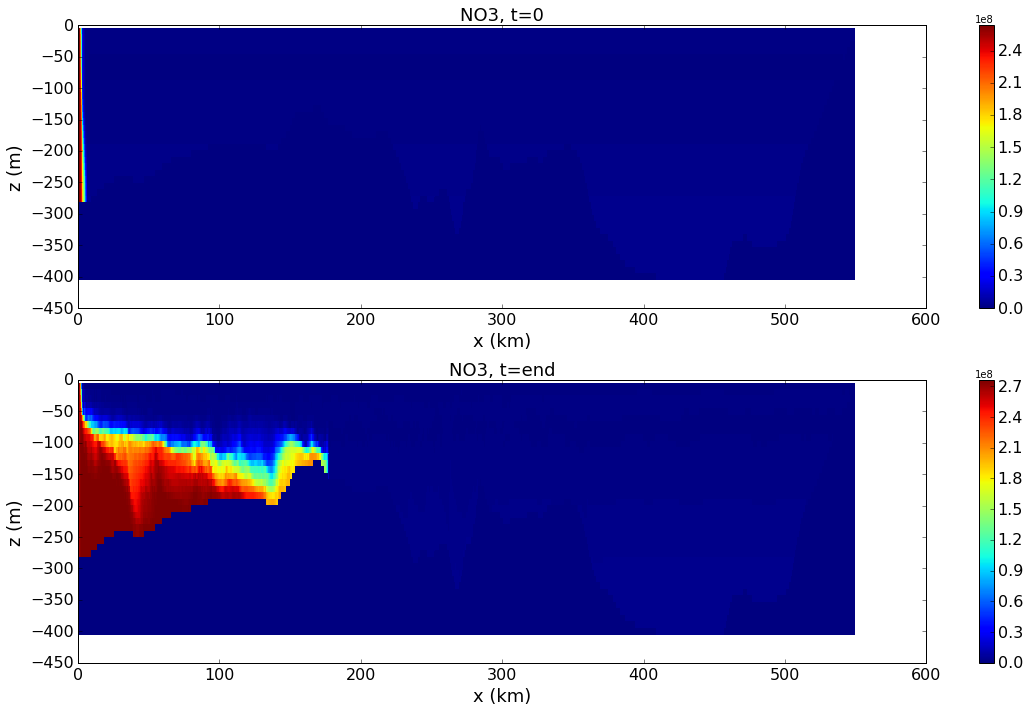

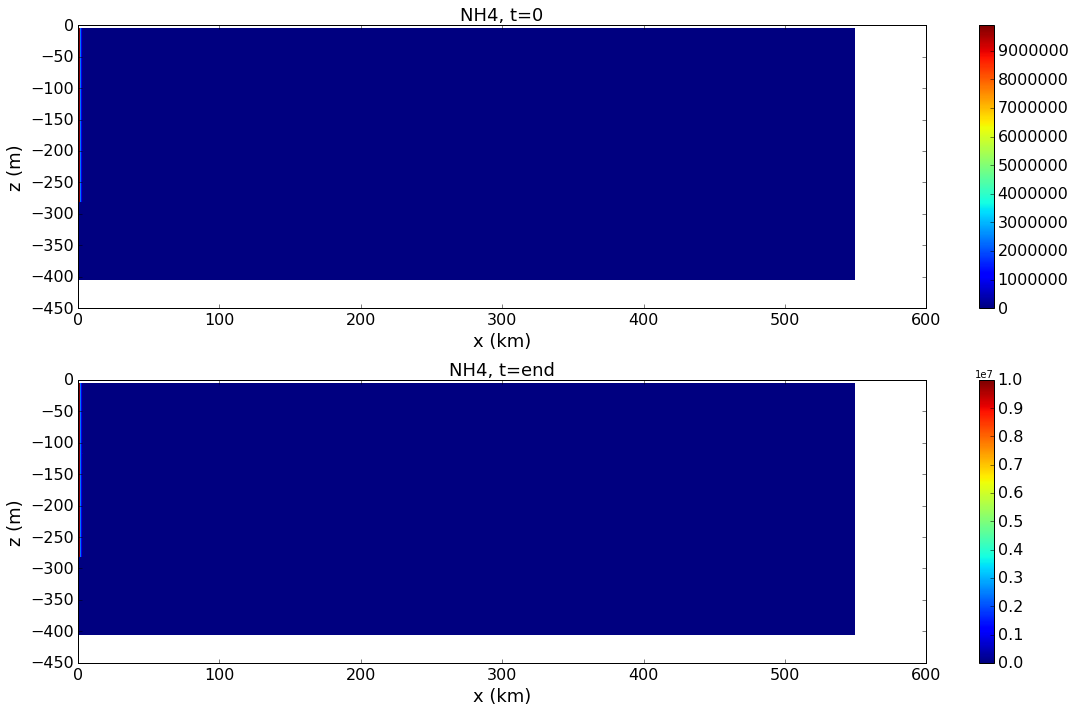

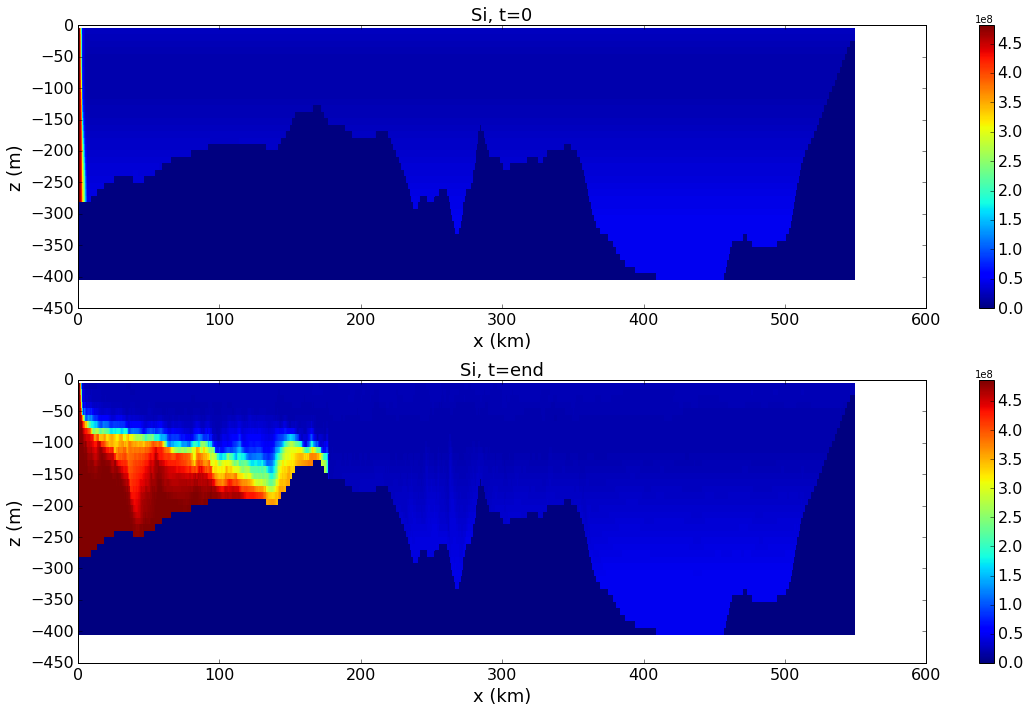

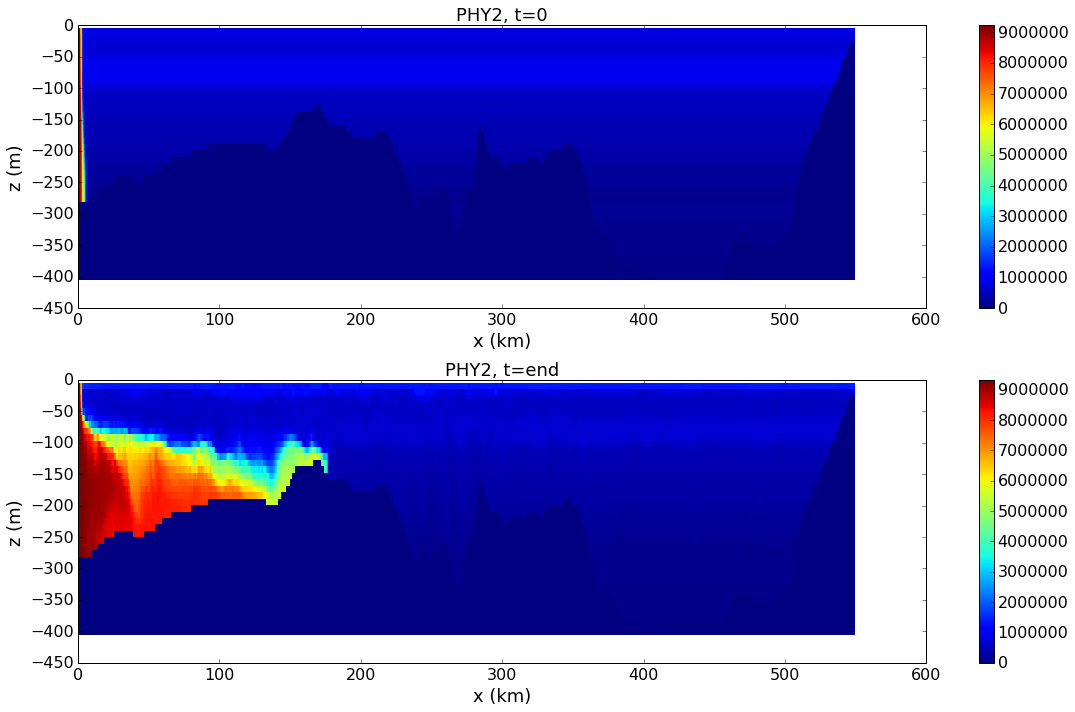

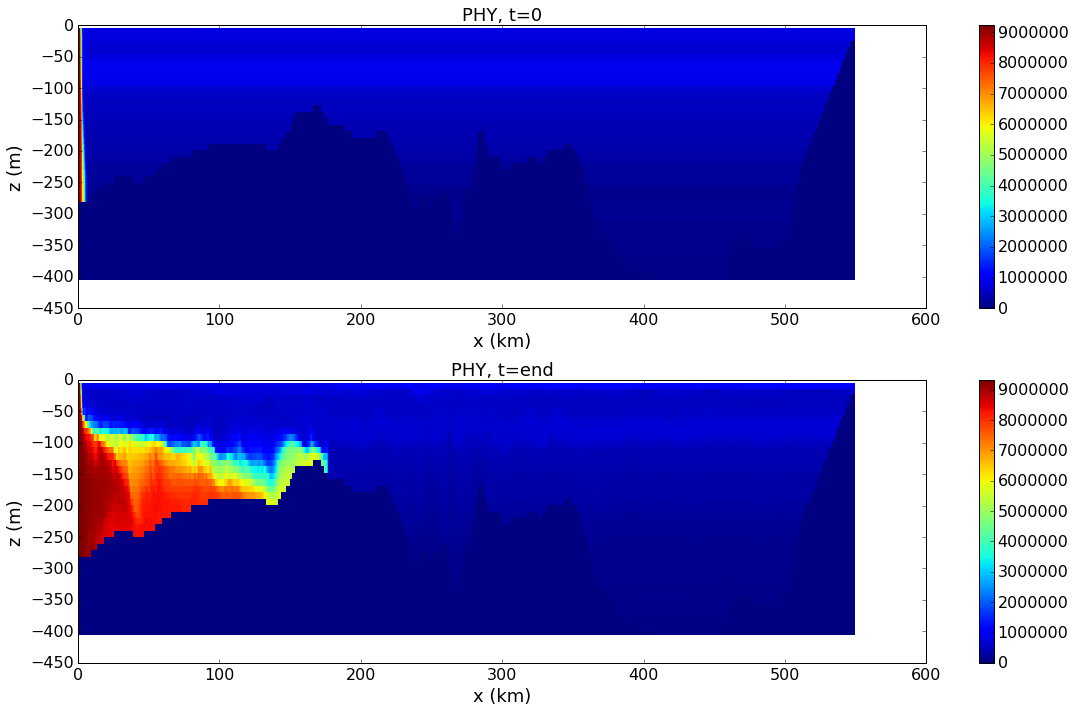

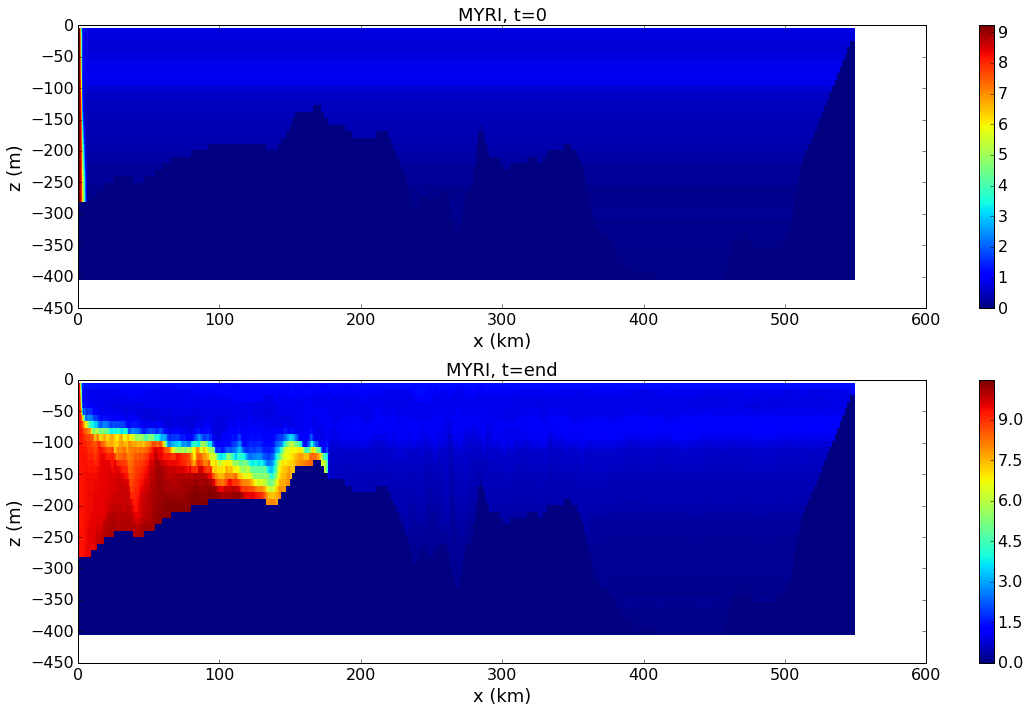

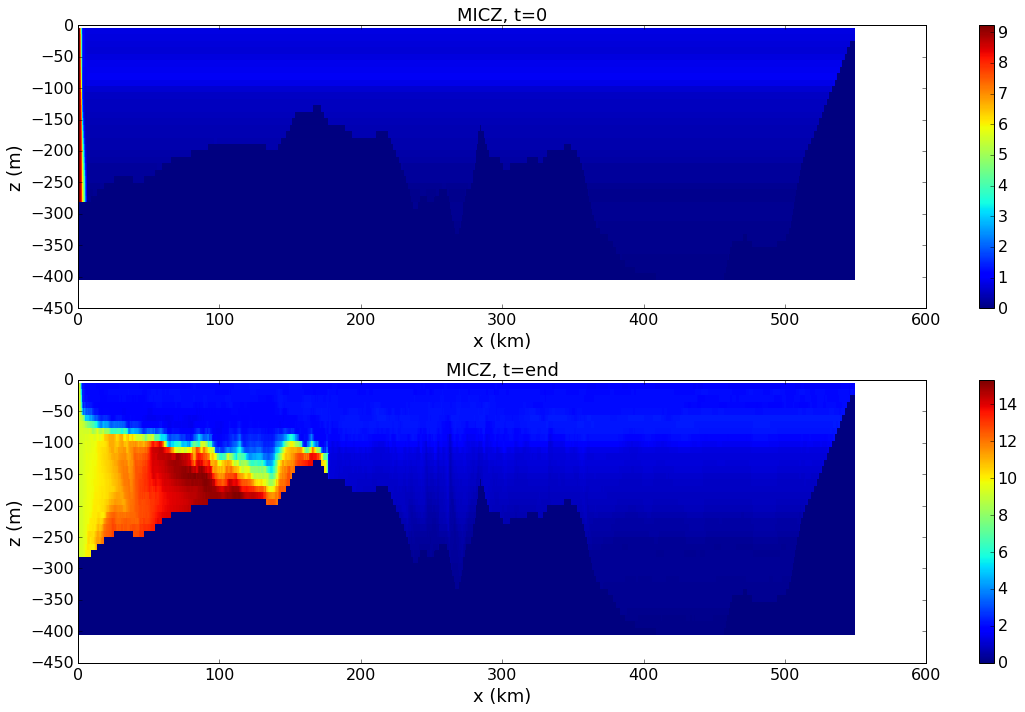

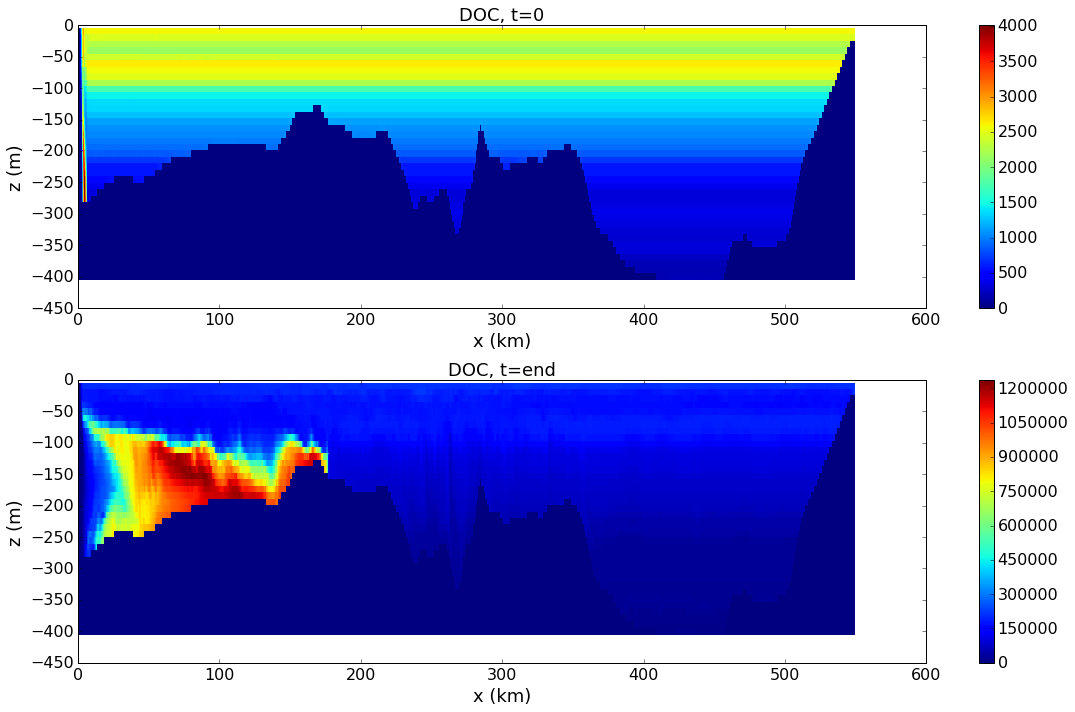

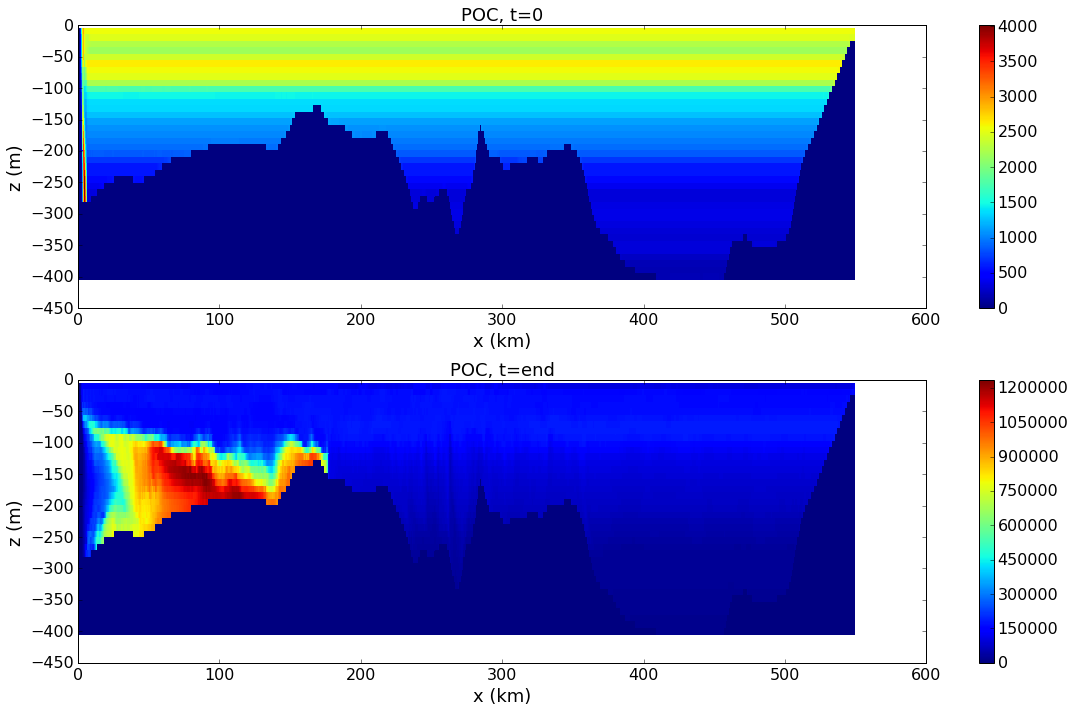

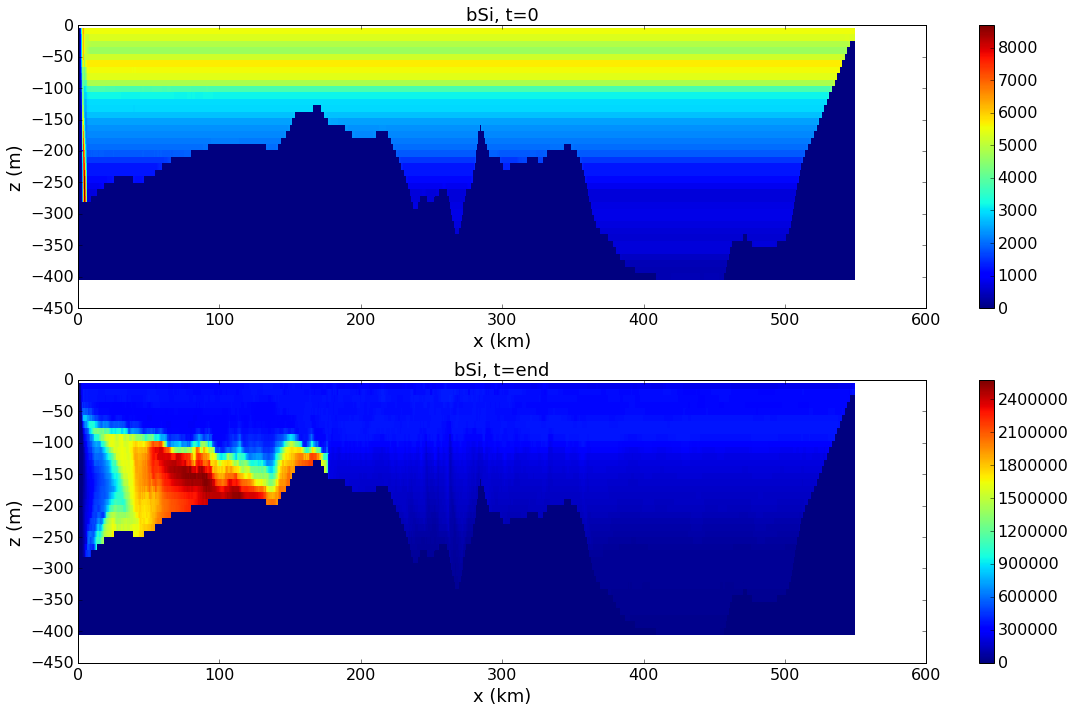

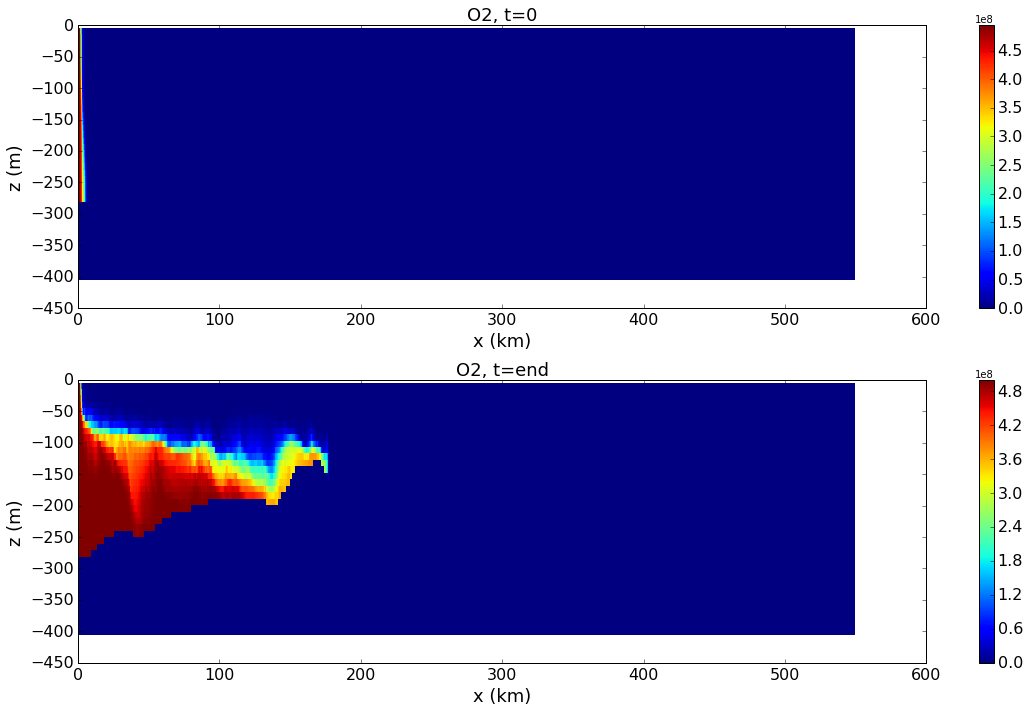

In [7]:
for ik in fkeys:
    if np.size(f.variables[ik].shape) == 4:
        fig, axs = plt.subplots(2,1,figsize=(16,10))
        print (ik)
        
        mesh0=axs[0].pcolormesh(xx,zz,f.variables[ik][0,:,5,:])
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('z (m)', fontsize=18)
        axs[0].set_xlabel('x (km)', fontsize=18)
        axs[0].set_title(ik + ', t=0', fontsize=18)
        #axs[0].autoscale(tight='True')
        #axs[0].axis([0, 550, -50, 0])
        #axs[0].axis([400, 550, -150, 0])
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)

        mesh1=axs[1].pcolormesh(xx,zz,f.variables[ik][-1,:,5,:])
        cb1=fig.colorbar(mesh1,ax=axs[1])
        axs[1].set_ylabel('z (m)', fontsize=18)
        axs[1].set_xlabel('x (km)', fontsize=18)
        axs[1].set_title(ik + ', t=end', fontsize=18)
        #axs[1].autoscale(tight='True')
        #axs[1].axis([500, 550, -50, 0])
        #axs[1].axis([400, 550, -150, 0])
        plt.setp(axs[1].get_xticklabels(),fontsize=16)
        plt.setp(axs[1].get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)
        plt.tight_layout()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


/home/eolson/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


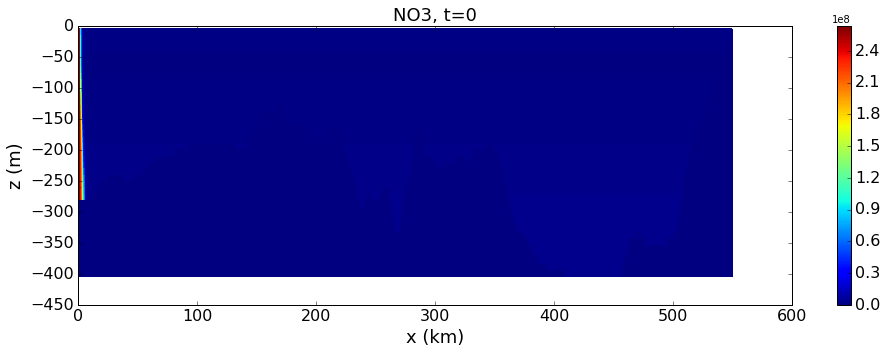

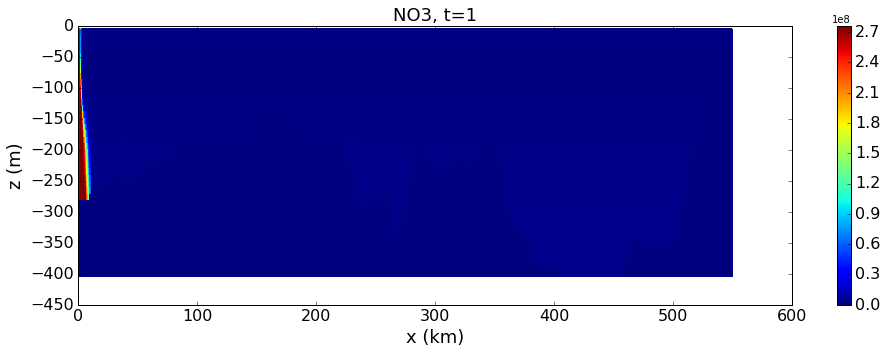

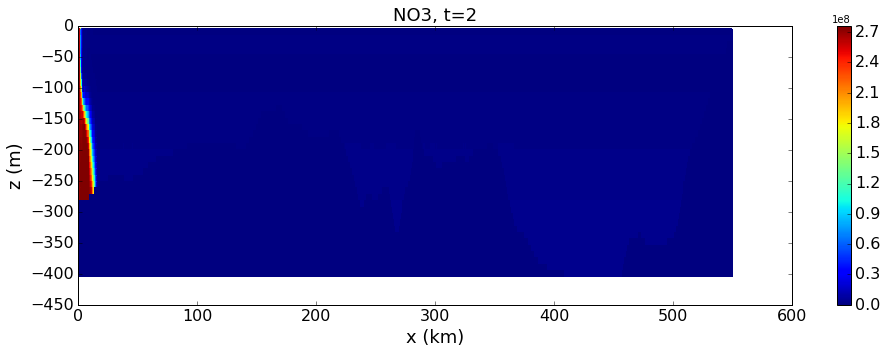

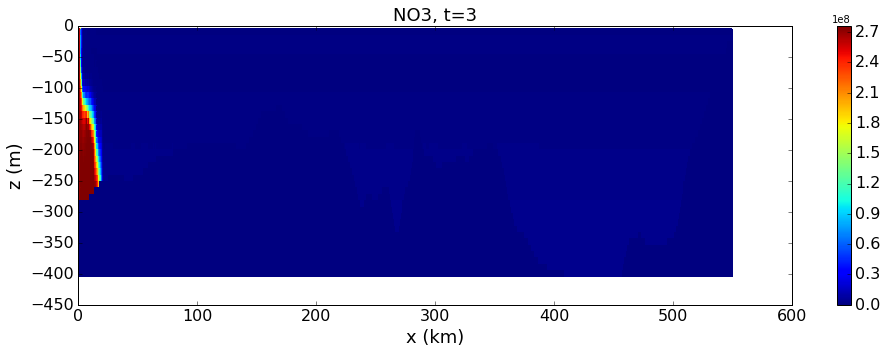

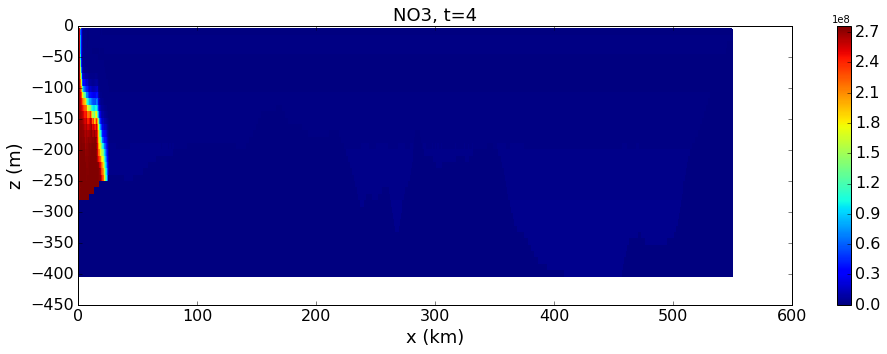

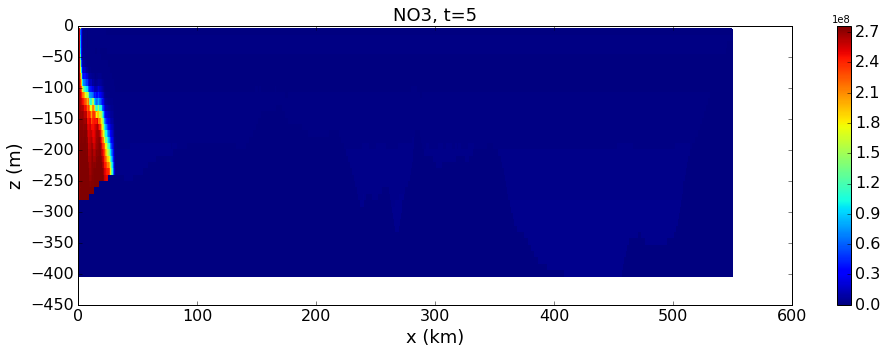

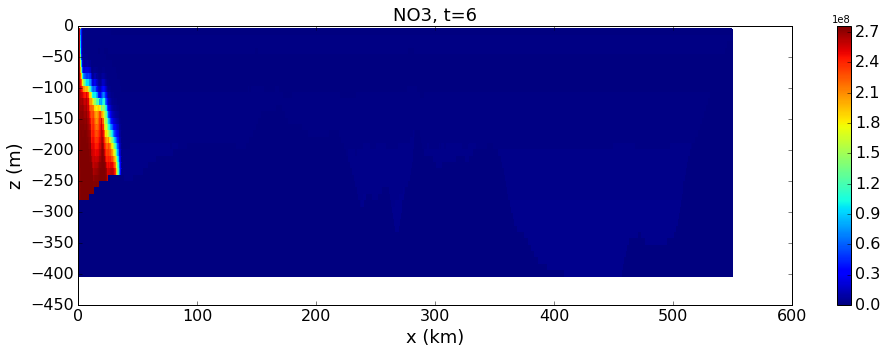

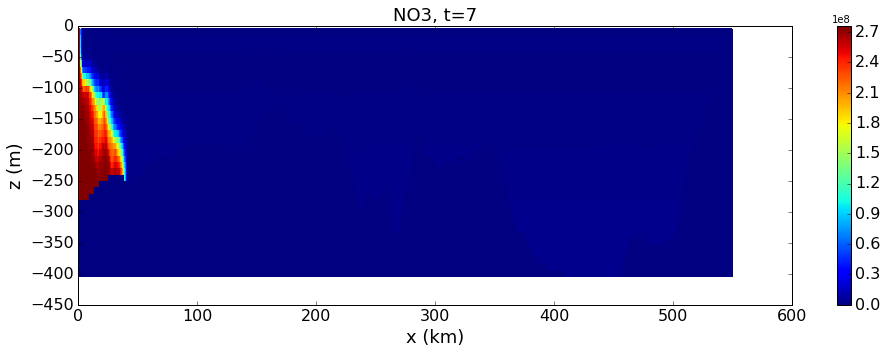

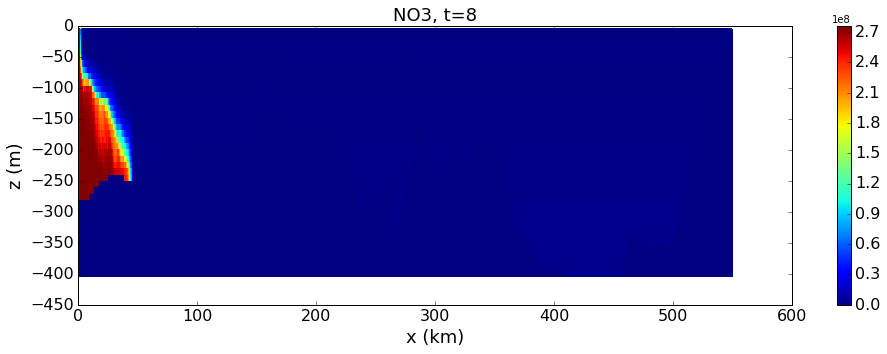

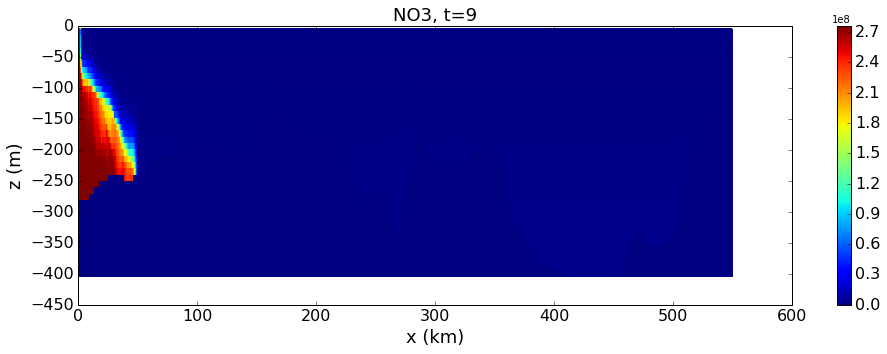

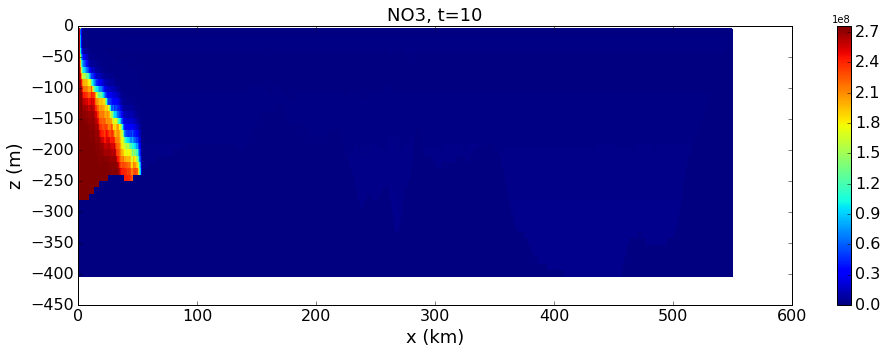

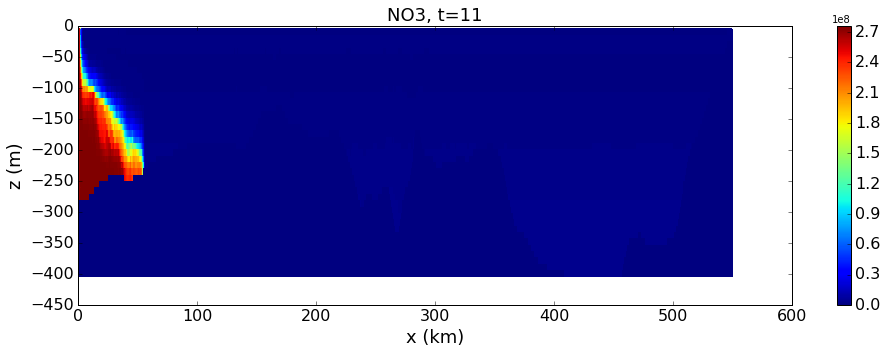

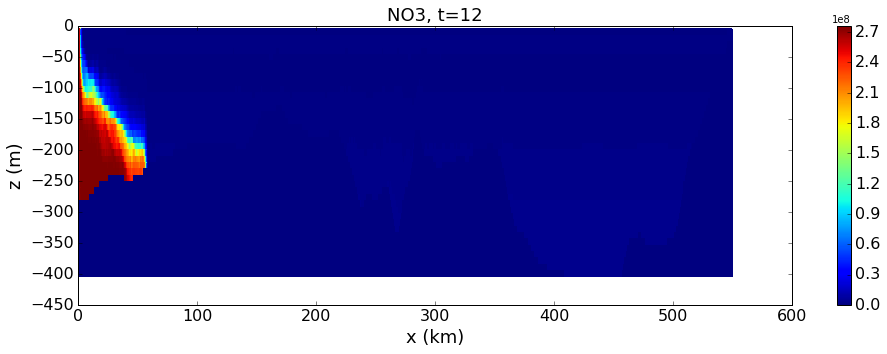

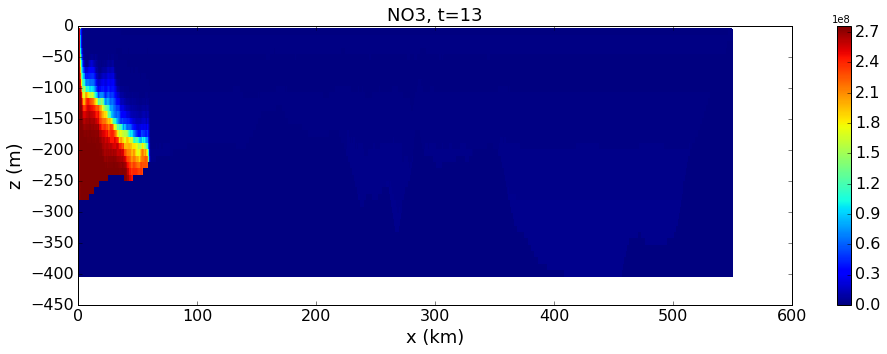

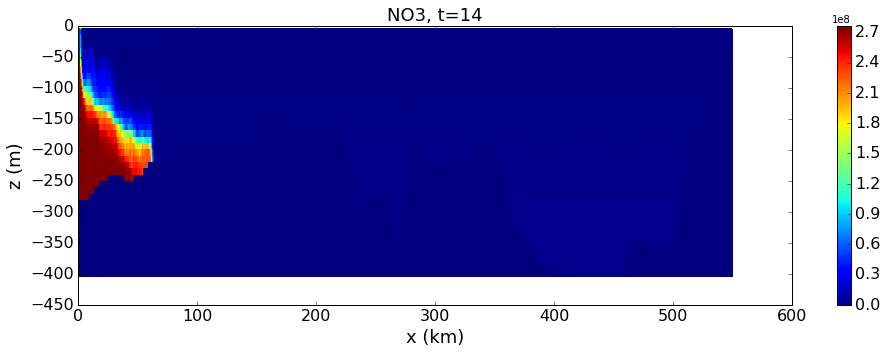

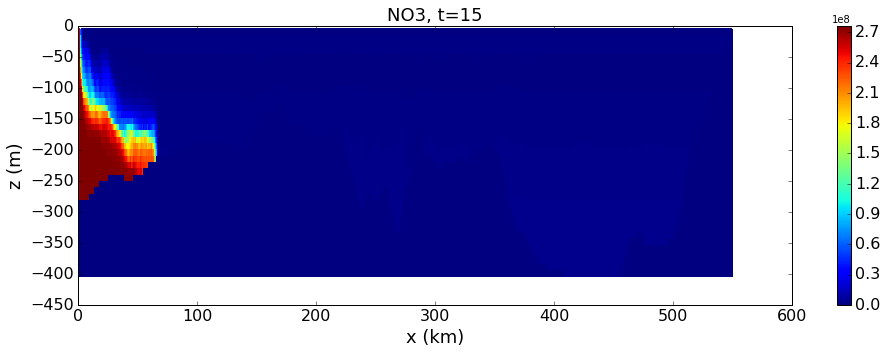

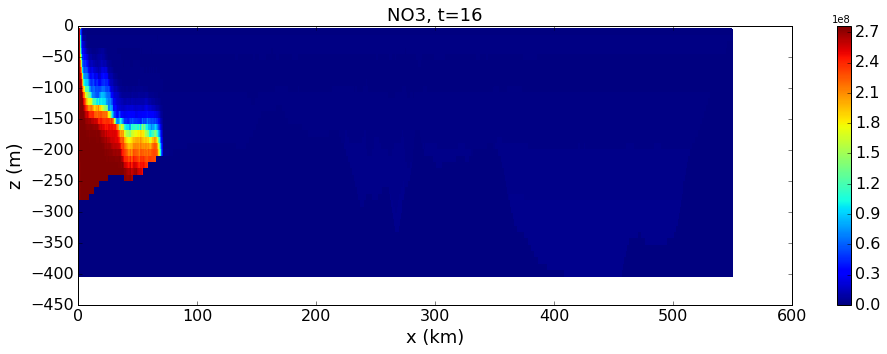

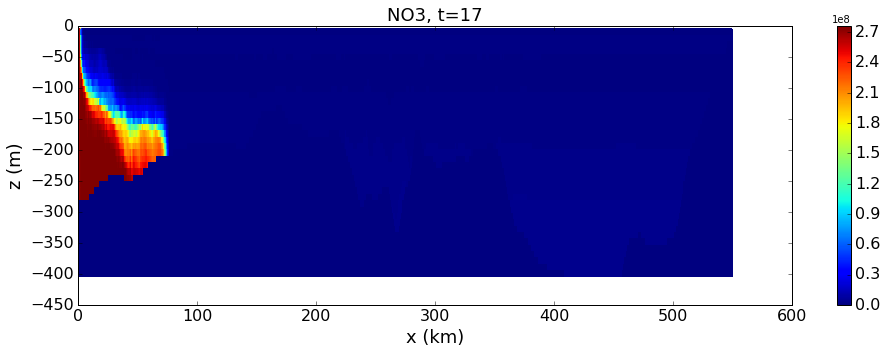

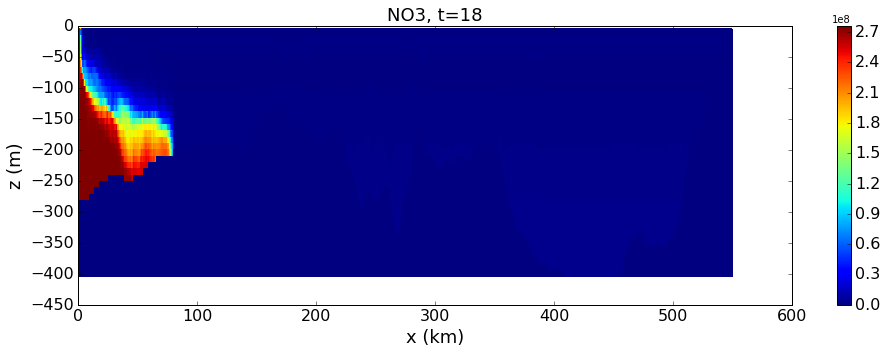

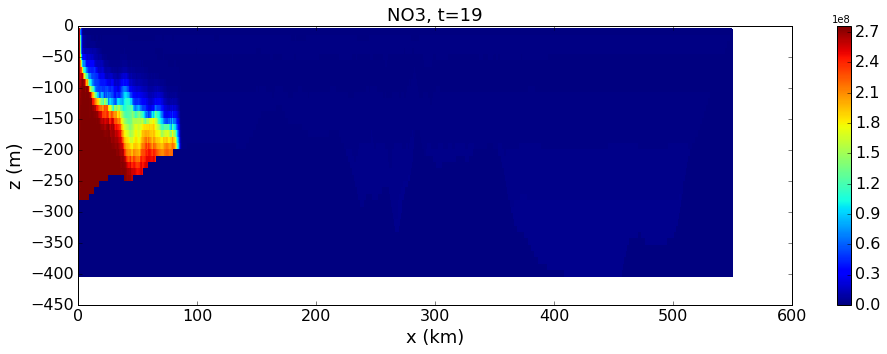

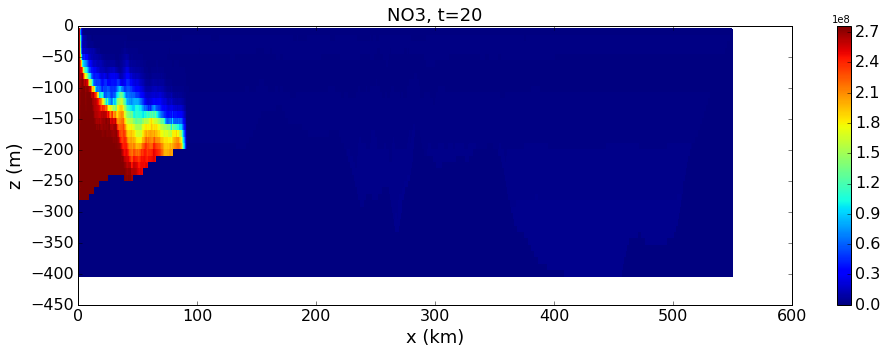

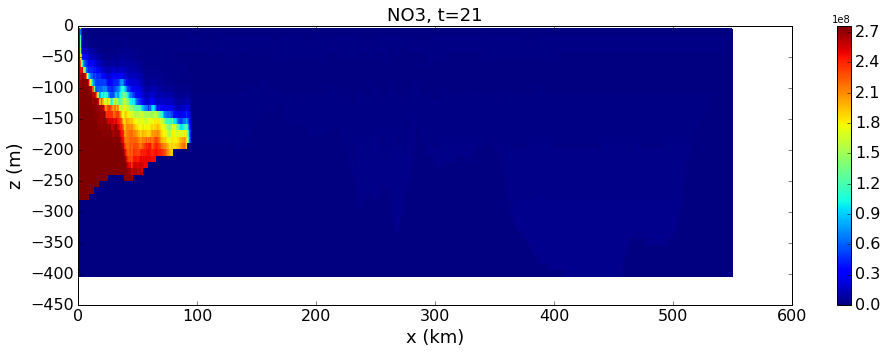

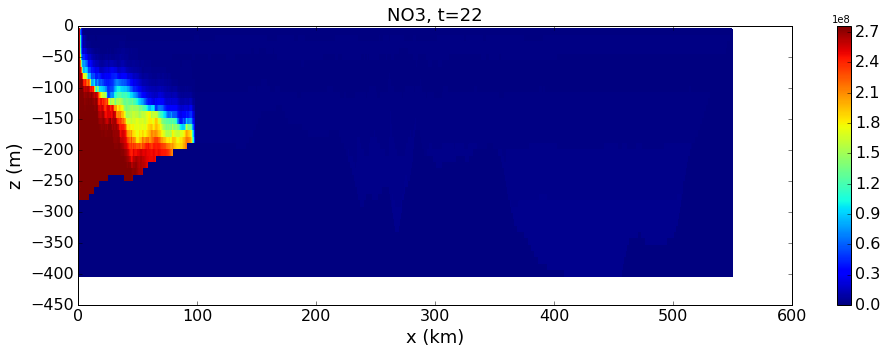

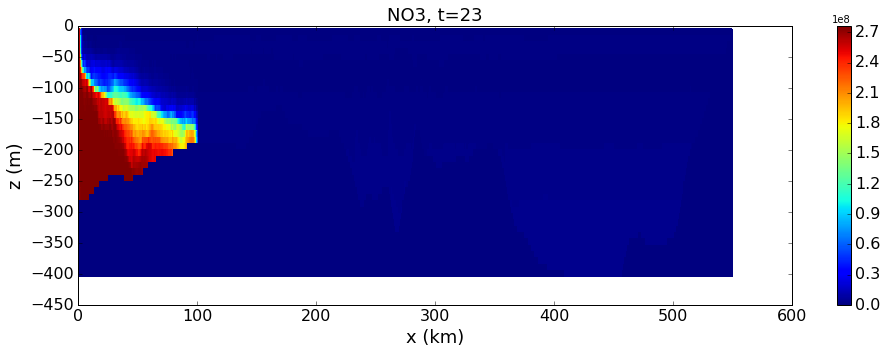

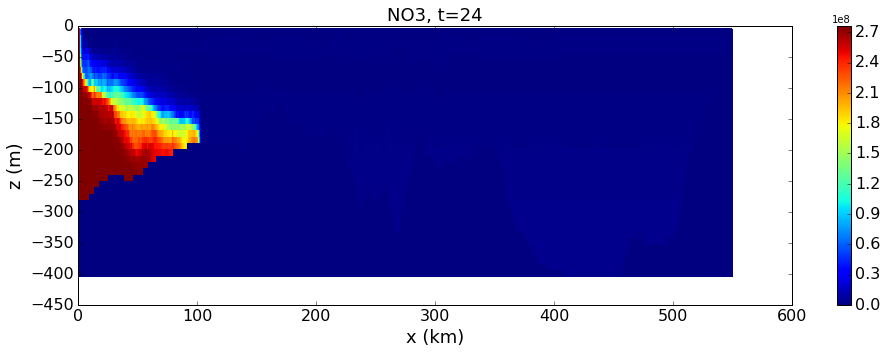

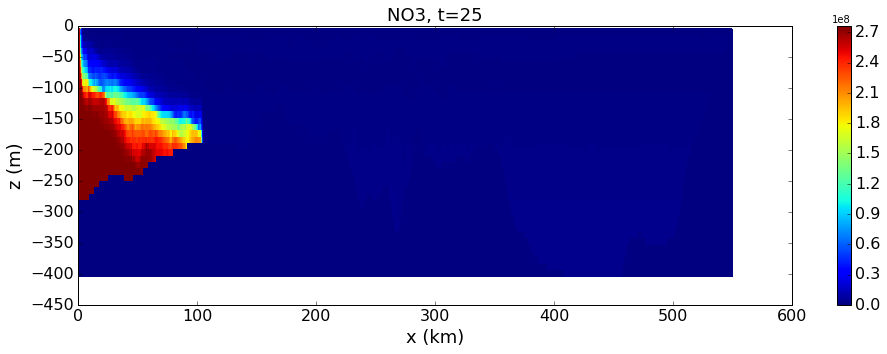

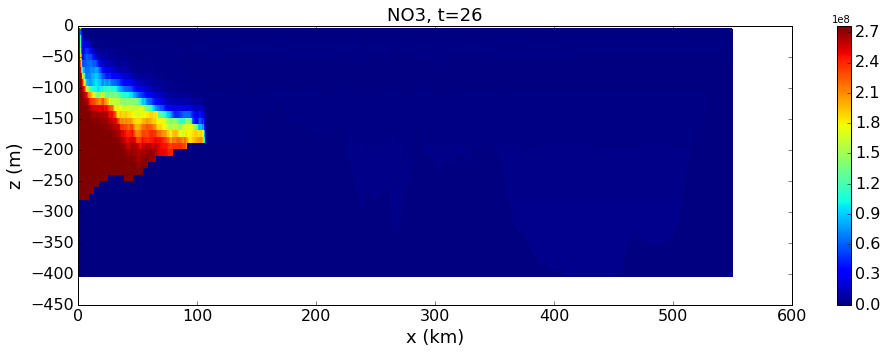

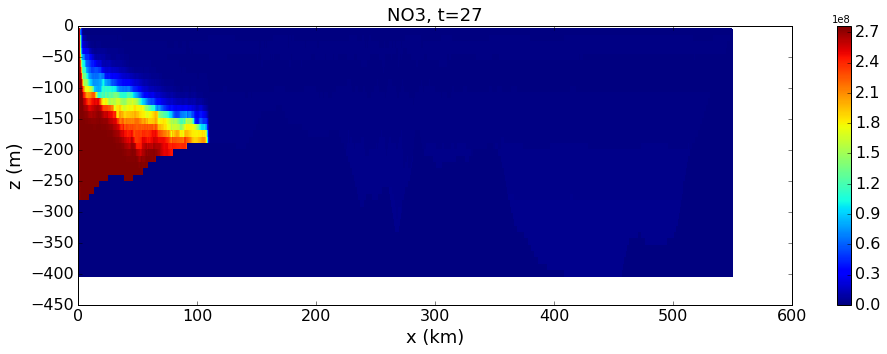

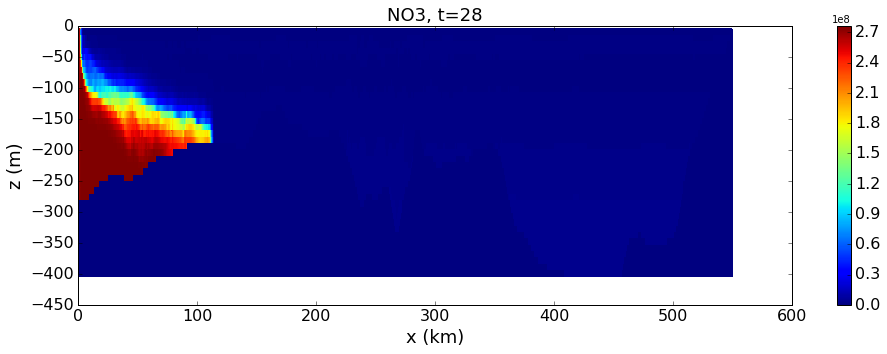

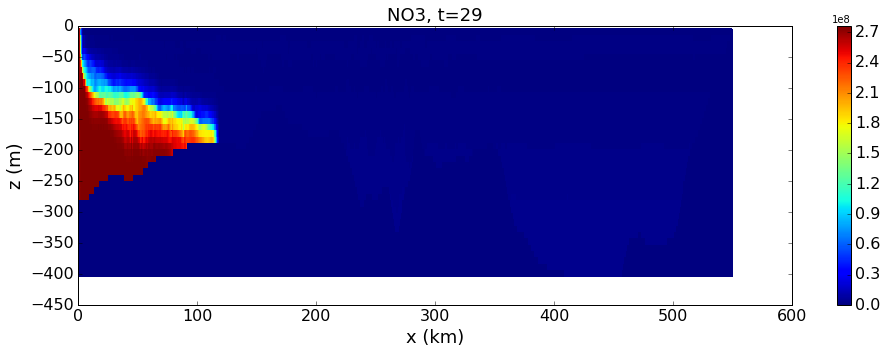

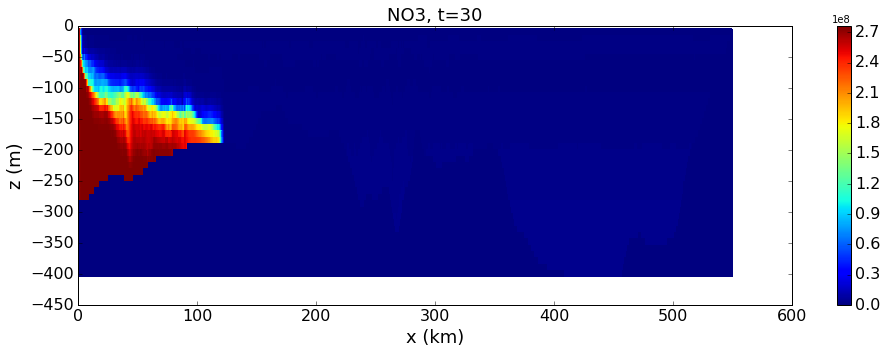

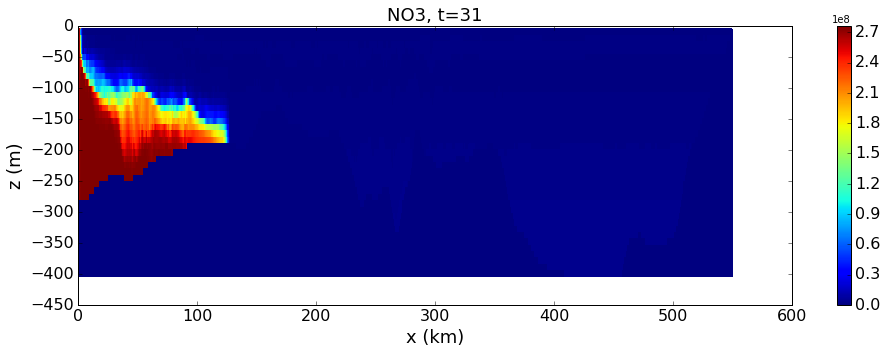

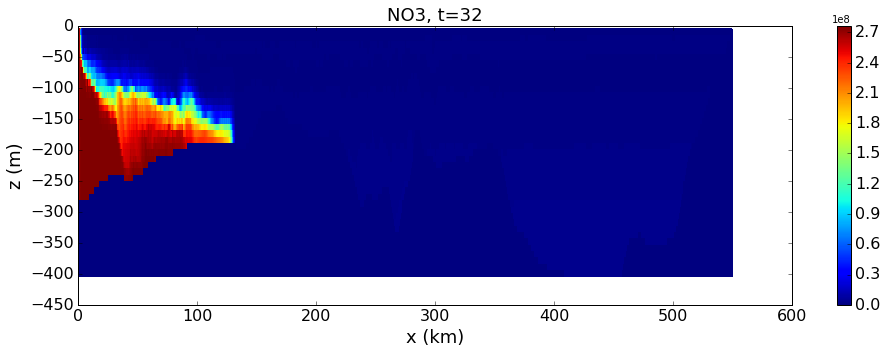

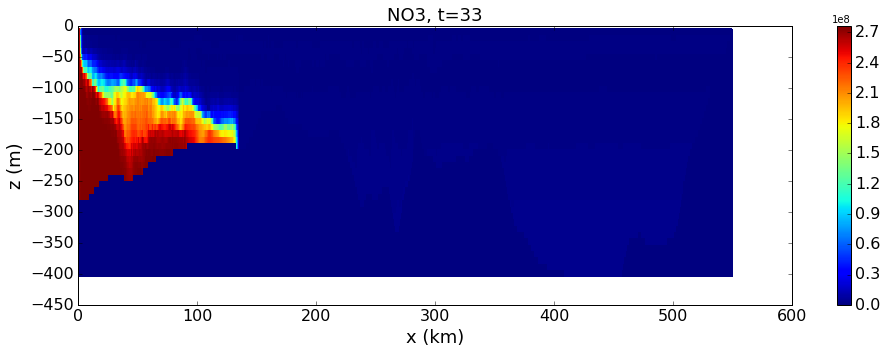

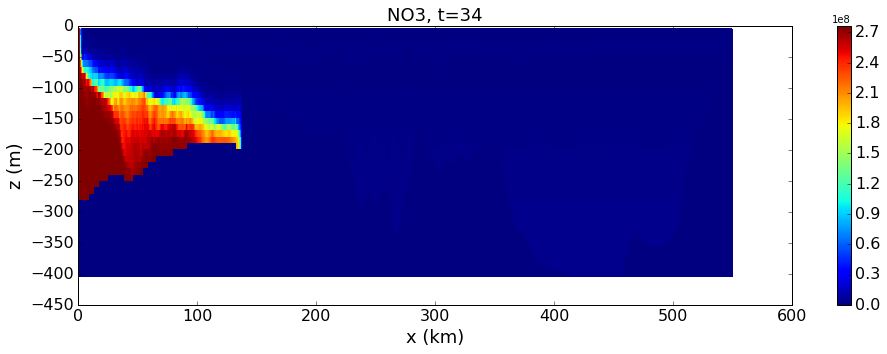

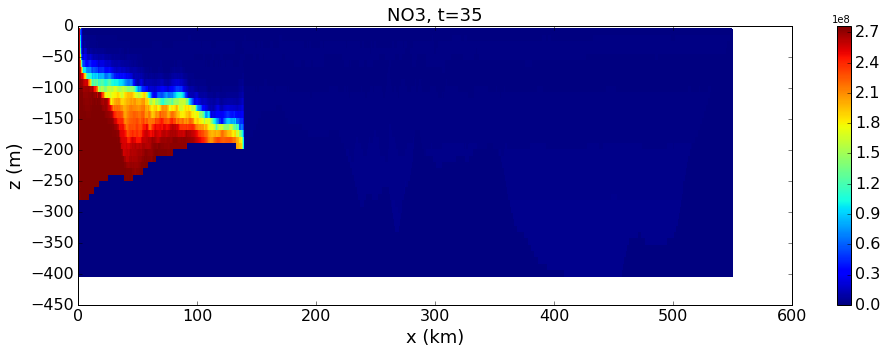

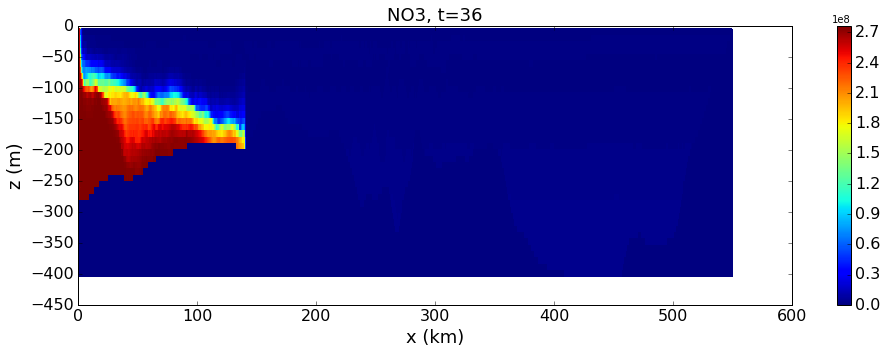

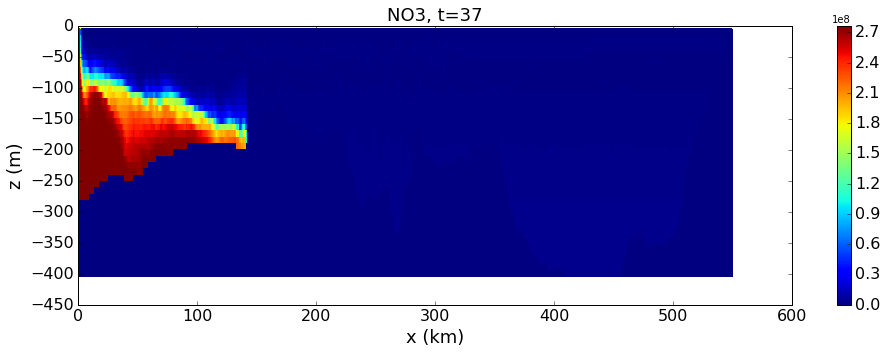

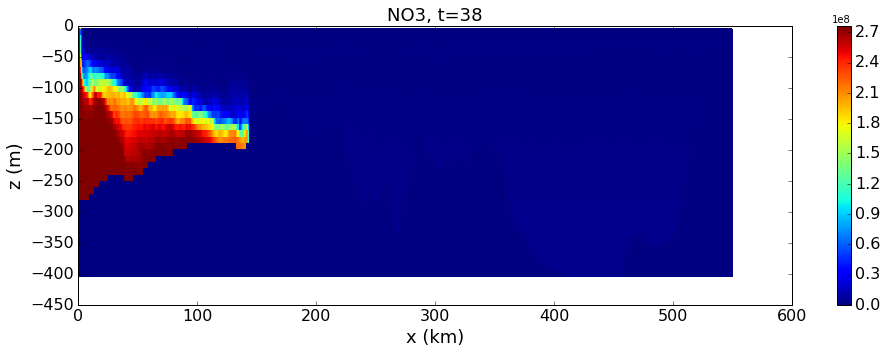

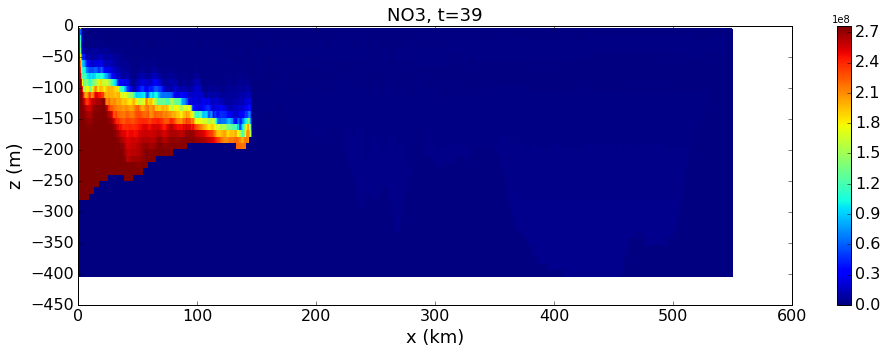

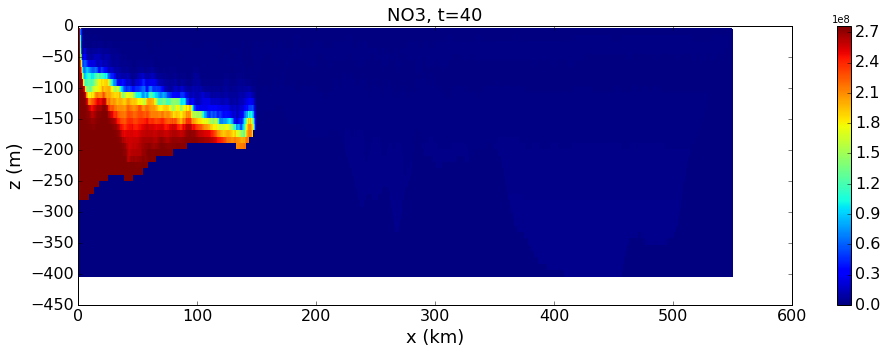

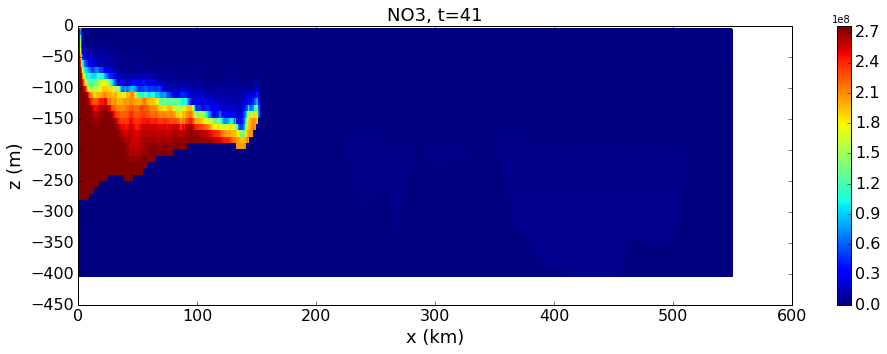

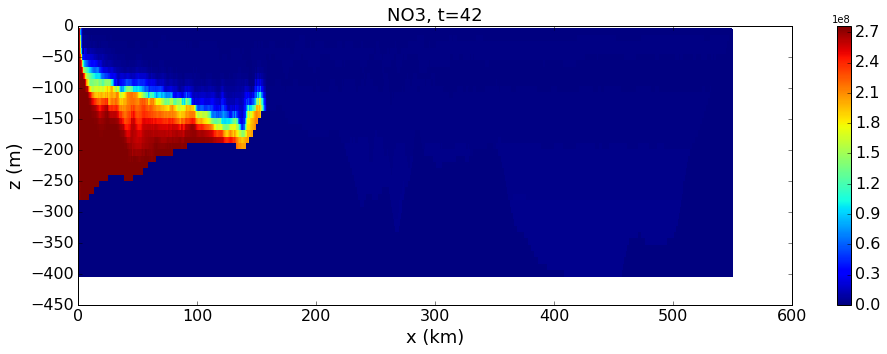

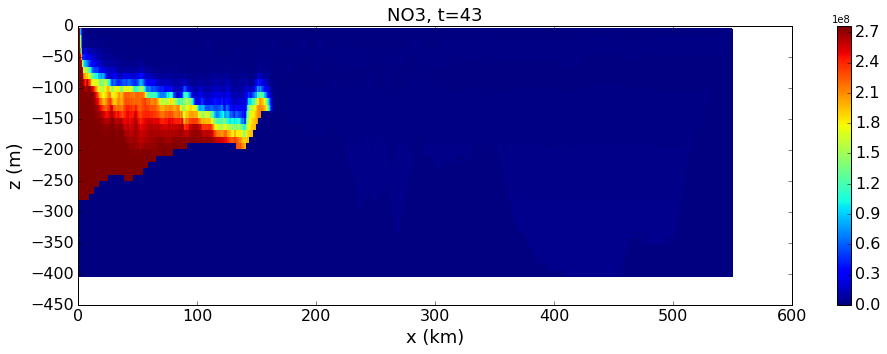

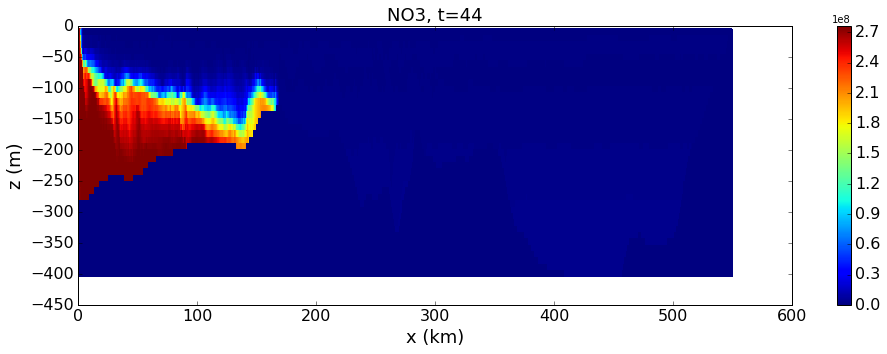

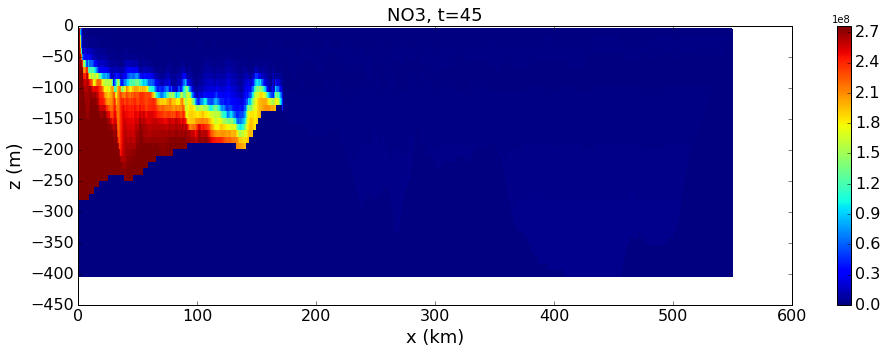

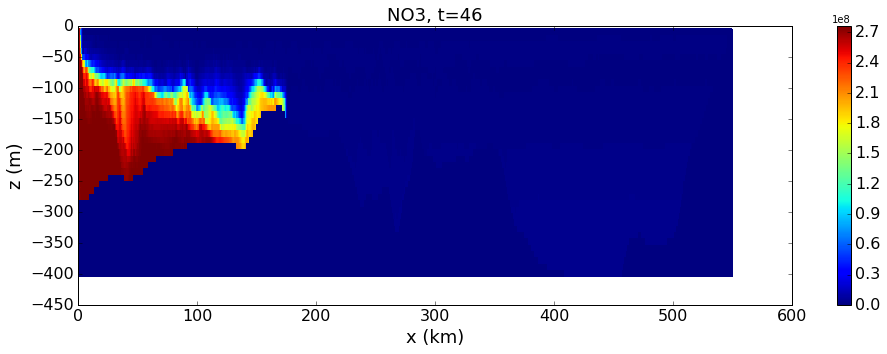

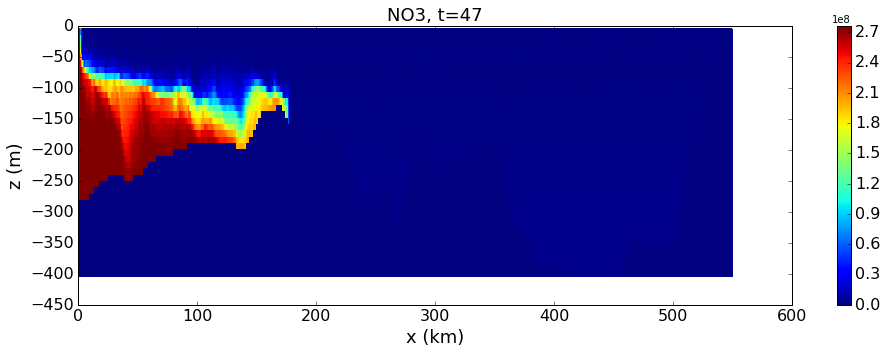

In [8]:
ik='NO3'
for it in range(48):
    if np.size(f.variables[ik].shape) == 4:
        fig, axs[0] = plt.subplots(1,1,figsize=(16,5))
        print (it)
        
        mesh0=axs[0].pcolormesh(xx,zz,f.variables[ik][it,:,5,:])
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('z (m)', fontsize=18)
        axs[0].set_xlabel('x (km)', fontsize=18)
        axs[0].set_title(ik + ', t='+ str(it), fontsize=18)
        #axs[0].autoscale(tight='True')
        #axs[0].axis([0, 550, -50, 0])
        #axs[0].axis([400, 550, -150, 0])
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)


In [9]:
#print(f.variables['O2'][23,1,:,1090:1099])
A=np.mean(f.variables['O2'][-1,1:2,5,1090:1099])
print(A)
B=np.mean(f.variables['O2'][0,1:2,5,1090:1099])
print(B)
print((A-B)/B*100,'%')

177.573
177.6
-0.0154392138938 %


In [10]:
print(f.variables['deptht'][:])

[   5.1282053    15.38461494   25.64102554   35.89743423   46.15384674
   56.41025543   66.66666412   76.92308044   87.17948914   97.43589783
  107.69230652  117.94871521  128.2051239   138.46153259  148.71794128
  158.97436523  169.23077393  179.48718262  189.74359131  200.
  210.25640869  220.51281738  230.76922607  241.02563477  251.28205872
  261.53845215  271.79486084  282.05126953  292.30767822  302.56411743
  312.82052612  323.07693481  333.33334351  343.5897522   353.84616089
  364.10256958  374.35897827  384.61538696  394.87179565  405.12820435]


In [11]:
print(f.variables['O2'][-1,1,5,1080:1099])
print(f.variables['O2'][-1,2,5,1080:1099])
print(f.variables['O2'][-1,3,5,1080:1099])
print(f.variables['O2'][-1,4,5,1080:1099])
print(f.variables['O2'][-1,5,5,1080:1099])

[ 177.59487915  177.59442139  177.59339905  177.59231567  177.59127808
  177.59078979  177.59068298  177.59025574  177.58828735  177.58283997
  177.58737183  177.5740509   177.5896759   177.58924866  177.59165955
  177.59231567  177.5854187   177.56195068  177.48167419]
[ 177.59989929  177.59999084  177.60003662  177.59999084  177.59991455
  177.59973145  177.59953308  177.59933472  177.59877014  177.60186768
  177.59933472  177.60566711    0.            0.            0.            0.
    0.            0.            0.        ]
[ 177.59928894  177.59928894  177.59924316  177.59918213  177.59909058
  177.59895325  177.59884644  177.59875488  177.59899902    0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.        ]
[ 177.59918213  177.59916687  177.59915161  177.59916687  177.59916687
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0. 

NO3
NH4
Si
PHY2
PHY
MYRI
MICZ
DOC
POC
bSi
O2


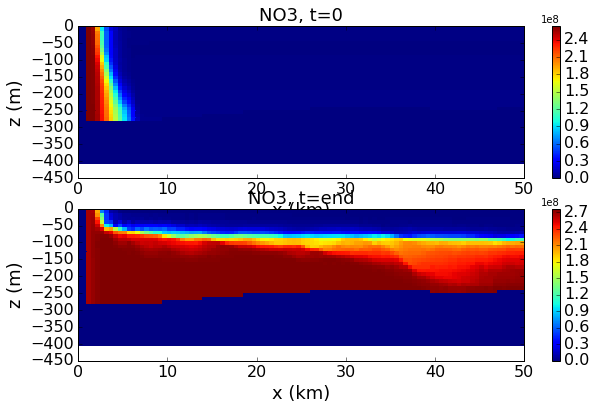

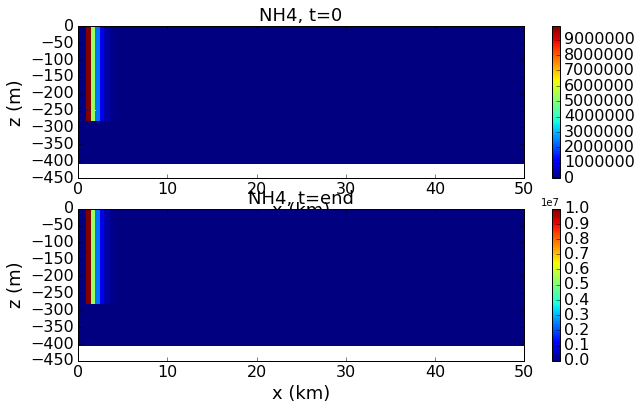

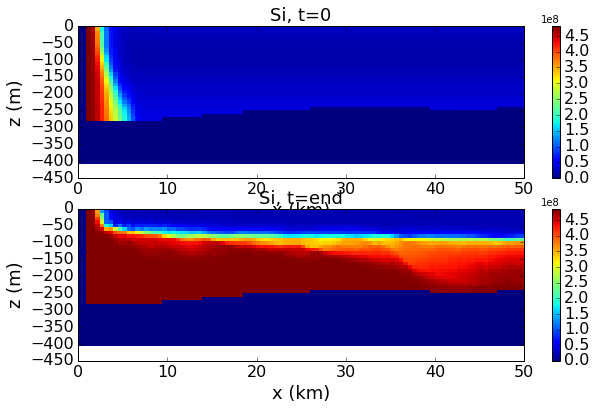

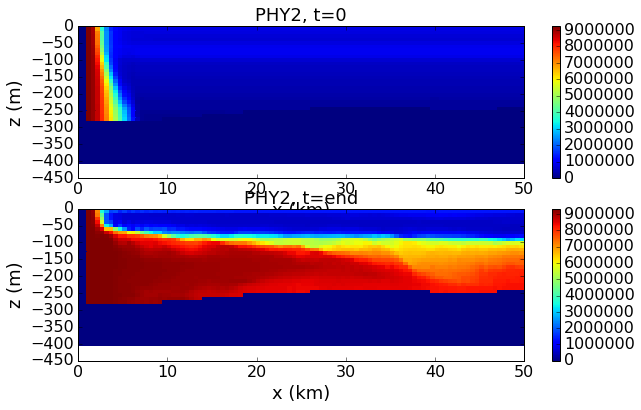

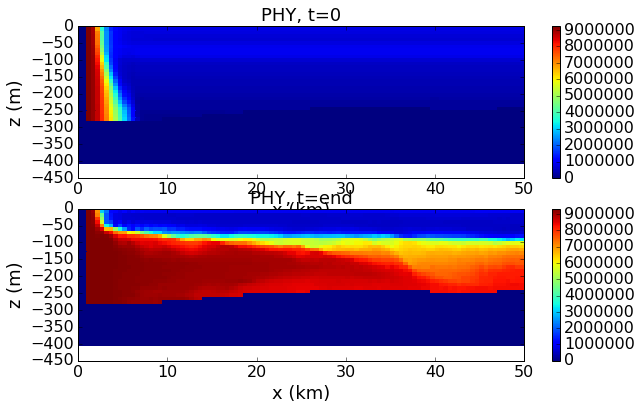

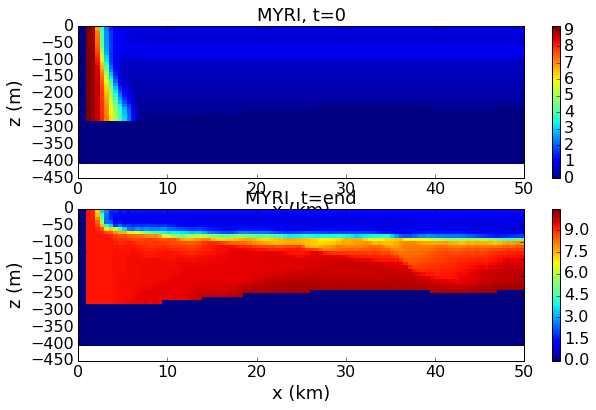

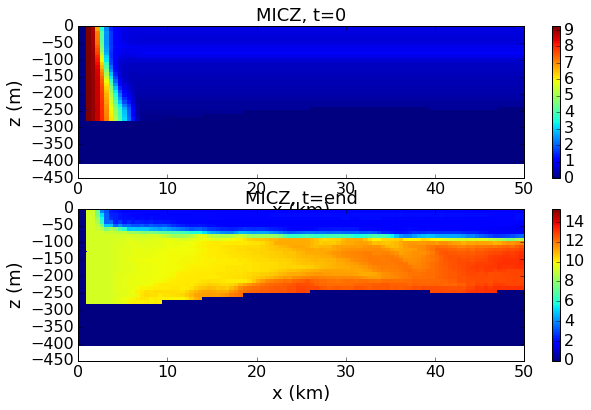

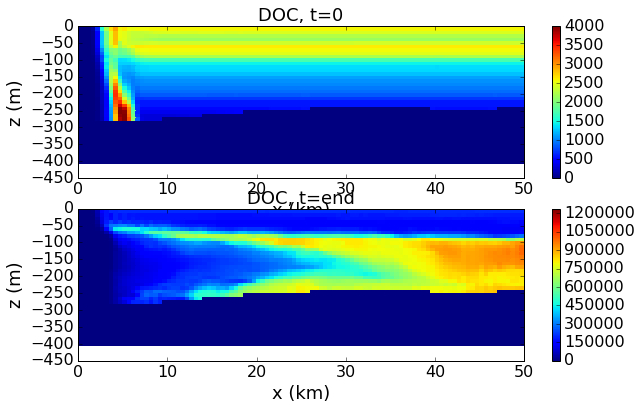

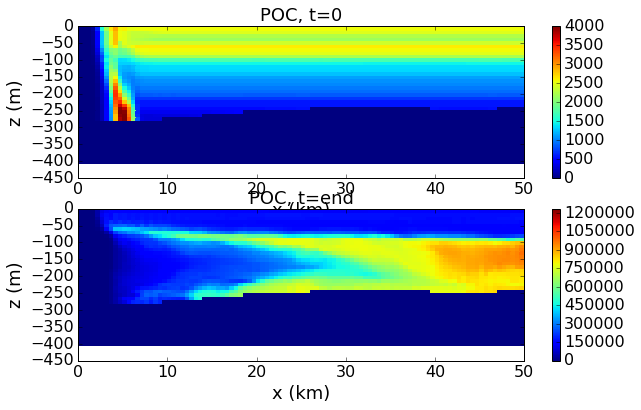

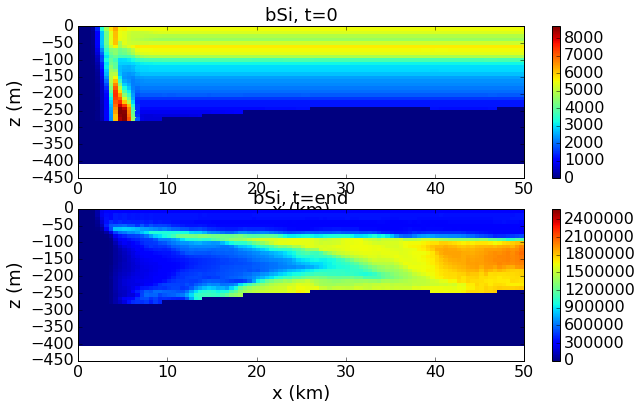

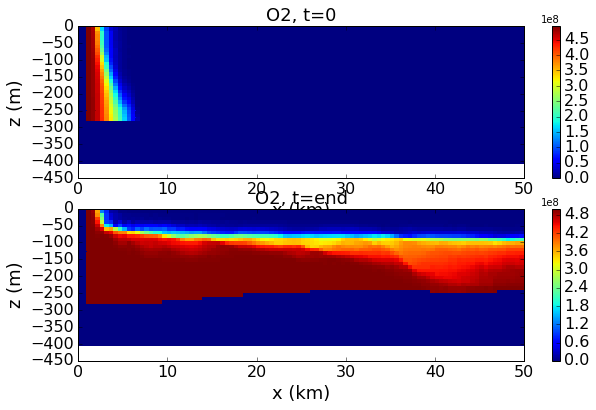

In [12]:
#zoom in:
for ik in fkeys:
    if np.size(f.variables[ik].shape) == 4:
        fig, axs = plt.subplots(2,1,figsize=(10,6))
        print (ik)
        
        mesh0=axs[0].pcolormesh(xx,zz,f.variables[ik][0,:,5,:])
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('z (m)', fontsize=18)
        axs[0].set_xlabel('x (km)', fontsize=18)
        axs[0].set_title(ik + ', t=0', fontsize=18)
        #axs[0].autoscale(tight='True')
        axs[0].axis([0, 50, -450, 0])
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)

        mesh1=axs[1].pcolormesh(xx,zz,f.variables[ik][-1,:,5,:])
        cb1=fig.colorbar(mesh1,ax=axs[1])
        axs[1].set_ylabel('z (m)', fontsize=18)
        axs[1].set_xlabel('x (km)', fontsize=18)
        axs[1].set_title(ik + ', t=end', fontsize=18)
        #axs[1].autoscale(tight='True')
        axs[1].axis([0, 50, -450, 0])
        plt.setp(axs[1].get_xticklabels(),fontsize=16)
        plt.setp(axs[1].get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)

In [13]:
fbdy=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_SOG_01/bdy_cond/bio_OBC.nc')

In [14]:
print(np.max(fbdy.variables['NO3']),np.min(fbdy.variables['NO3']))

2.6656e+08 2.6656e+08


In [15]:
print(np.max(fbdy.variables['NH4']),np.min(fbdy.variables['NH4']))

1e+07 1e+07


In [16]:
print(np.max(fbdy.variables['PHY2']),np.min(fbdy.variables['PHY2']))

9.32611e+06 9.32611e+06


In [18]:
vv=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_SOG_01/SOG2D_1h_20141019_20141020_grid_V.nc')
uu=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_SOG_01/SOG2D_1h_20141019_20141020_grid_U.nc')

In [19]:
print(vv.variables['vomecrty'])

<class 'netCDF4._netCDF4.Variable'>
float32 vomecrty(time_counter, depthv, y, x)
    standard_name: sea_water_y_velocity
    long_name: ocean current along j-axis
    units: m/s
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 h
    cell_methods: time: mean (interval: 40 s)
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered depthv nav_lon nav_lat
unlimited dimensions: time_counter
current shape = (48, 40, 10, 1100)
filling on


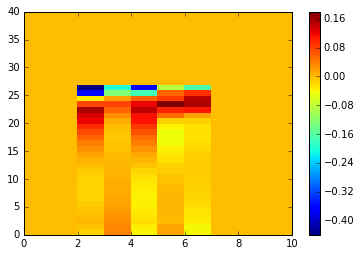

In [21]:
mesh0=plt.pcolormesh(vv.variables['vomecrty'][19,:,:,4])
cb0=plt.colorbar(mesh0)

In [23]:
print(uu.variables)

OrderedDict([('nav_lat', <class 'netCDF4._netCDF4.Variable'>
float32 nav_lat(y, x)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    nav_model: grid_U
unlimited dimensions: 
current shape = (10, 1100)
filling off
), ('nav_lon', <class 'netCDF4._netCDF4.Variable'>
float32 nav_lon(y, x)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    nav_model: grid_U
unlimited dimensions: 
current shape = (10, 1100)
filling off
), ('depthu', <class 'netCDF4._netCDF4.Variable'>
float32 depthu(depthu)
    long_name: Vertical U levels
    units: m
    axis: Z
    positive: down
    bounds: depthu_bounds
unlimited dimensions: 
current shape = (40,)
filling off
), ('depthu_bounds', <class 'netCDF4._netCDF4.Variable'>
float32 depthu_bounds(depthu, axis_nbounds)
unlimited dimensions: 
current shape = (40, 2)
filling off
), ('vozocrtx', <class 'netCDF4._netCDF4.Variable'>
float32 vozocrtx(time_counter, depthu, y, x)
    standard_name: sea_water_x_

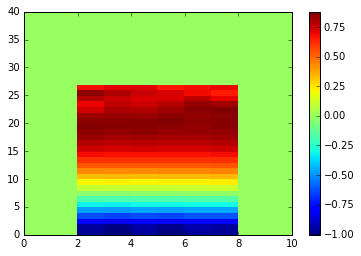

In [29]:
mesh0=plt.pcolormesh(uu.variables['vozocrtx'][19,:,:,2])
cb0=plt.colorbar(mesh0)